In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

## 전처리 완료된 파일 불러오기

In [30]:
_hearts = pd.read_csv(os.path.join("data", "heart_rate_all_day.csv"))
_steps = pd.read_csv(os.path.join("data", "step_count_all_day.csv"))

## 사용할 시간 추출
- 기상 시간 09시 15분
- 집에서 출발한 시간 11시 45분
- 집에 도착한 시각 19시 30분
- 690 ~ 1170 인덱스까지 사용하는 것으로 결정

In [62]:
hearts = _hearts[690:1170]
steps = _steps[690:1170]

In [63]:
hearts = hearts.applymap(lambda x: x[-5:] if type(x) == str else x)
steps = steps.applymap(lambda x: x[-5:] if type(x) == str else x)

In [64]:
hearts_x = list(hearts["Time"])
hearts_y = list(hearts["Hearts"])

In [67]:
steps_x = list(steps["Time"])
steps_y = list(steps["Step"])

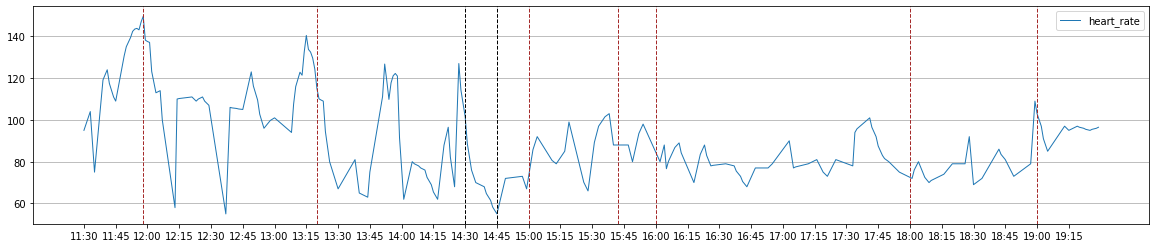

In [88]:
plt.plot(hearts_x, hearts_y, label = "heart_rate")
plt.rcParams['figure.figsize'] = (20, 4)
plt.rcParams['font.size'] = 10
plt.rcParams["lines.linewidth"] = 1
plt.xticks(np.arange(0, 480, 15))
plt.grid(True, axis='y')

plt.axvline(28, color = 'brown', linestyle = '--', linewidth = 1) # 11:58 pm
plt.axvline(110, color = 'brown', linestyle = '--', linewidth = 1) # 13:20 pm
plt.axvline(180, color = 'black', linestyle = '--', linewidth = 1) # 14:30 pm
plt.axvline(195, color = 'black', linestyle = '--', linewidth = 1) # 14:30 pm
plt.axvline(210, color = 'brown', linestyle = '--', linewidth = 1) # 15:00 pm
plt.axvline(252, color = 'brown', linestyle = '--', linewidth = 1) # 15:42 pm
plt.axvline(270, color = 'brown', linestyle = '--', linewidth = 1) # 16:00 pm
plt.axvline(390, color = 'brown', linestyle = '--', linewidth = 1) # 18:00 pm
plt.axvline(450, color = 'brown', linestyle = '--', linewidth = 1) # 19:00 pm

plt.legend()

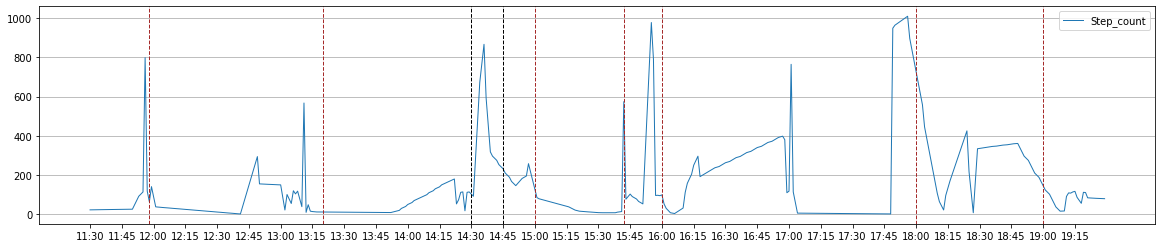

In [89]:
plt.plot(steps_x, steps_y, label = "Step_count")
plt.rcParams['figure.figsize'] = (20, 4)
plt.rcParams['font.size'] = 10
plt.rcParams["lines.linewidth"] = 1
plt.xticks(np.arange(0, 480, 15))
plt.grid(True, axis='y')

plt.axvline(28, color = 'brown', linestyle = '--', linewidth = 1) # 11:58 pm
plt.axvline(110, color = 'brown', linestyle = '--', linewidth = 1) # 13:20 pm
plt.axvline(180, color = 'black', linestyle = '--', linewidth = 1) # 14:30 pm
plt.axvline(195, color = 'black', linestyle = '--', linewidth = 1) # 14:30 pm
plt.axvline(210, color = 'brown', linestyle = '--', linewidth = 1) # 15:00 pm
plt.axvline(252, color = 'brown', linestyle = '--', linewidth = 1) # 15:42 pm
plt.axvline(270, color = 'brown', linestyle = '--', linewidth = 1) # 16:00 pm
plt.axvline(390, color = 'brown', linestyle = '--', linewidth = 1) # 18:00 pm
plt.axvline(450, color = 'brown', linestyle = '--', linewidth = 1) # 19:00 pm

plt.legend()

## 고려 사항
- 이동 상태에서의 평균 심박수
    - 느리게 걷기 (실내에서 이동) -> move
    - 평범하게 걷기 (평범한 이동) -> walk
    - 빠르게 걷기 (지하철 타러 갈 때) -> run
- 일반 상태에서의 평균 심박수 
    - 정지 상태 -> stay
    - 집중 상태 -> flow
- 휴식 상태에서의 평균 심박수 
    - 일반 휴식 -> rest
    - 수면 상태 (사용 X) -> sleep
- 긴장 상태(면접)에서의 평균 심박수 -> nervous

--------------

## 데이터에 알맞게 상태 분류 재정의
- 실내 이동 -> move
- 걷기 -> walk
- 빠른 걷기 -> run
- 지하철 탑승 중 -> subway
- 긴장 -> nervous
- 카페(휴식) -> stay

In [91]:
my_state = [
    ["move", "11:30", "11:45"],
    ["run", "11:46", "11:58"],
    ["subway", "11:59", "12:34"],
    ["walk", "12:35", "12:37"],
    ["subway", "12:38", "12:44"],
    ["walk", "12:45", "12:50"],
    ["subway", "12:51", "13:01"],
    ["walk", "13:02", "13:10"],
    ["stay", "13:11", "14:30"],
    ["walk", "14:31", "14:45"],
    ["stay", "14:46", "14:52"],
    ["move", "14:53", "14:59"],
    ["nervous", "15:00", "15:40"],
    ["move", "15:41", "15:48"],
    ["walk", "15:49", "16:10"],
    ["stay", "16:11", "16:50"],
    ["walk", "16:51", "17:05"],
    ["stay", "17:06", "17:45"],
    ["walk", "17:46", "17:55"],
    ["subway", "17:56", "18:07"],
    ["walk", "18:08", "18:11"],
    ["subway", "18:12", "18:18"],
    ["walk", "18:19", "18:30"],
    ["subway", "18:31", "19:07"],
    ["walk", "19:08", "19:30"]
]

In [94]:
point = 690
for my in my_state:
    start = my[1].split(":")
    end = my[2].split(":")
    
    start = (int(start[0]) * 60) + int(start[1])
    end = (int(end[0]) * 60) + int(end[1])
    
    my += [(start - point), (end - point)]

In [117]:
import numpy as np

In [158]:
def calAvg(info):
    afterAvg = []
    for i, v in enumerate(my_state):
        if i != len(my_state) - 1:
            label, start_idx, end_idx = v[0], v[3], v[4]
        else:
            label, start_idx, end_idx = v[0], v[3], v[4] - 1
            
        _avg = np.array(info[start_idx:end_idx + 1])
        _avg = np.average(_avg)
        _avg = [label, start_idx, end_idx, _avg]
        afterAvg.append(_avg)
        
    return afterAvg        

In [161]:
hearts_avg = calAvg(hearts_y)
steps_avg = calAvg(steps_y)

In [162]:
hearts_avg

[['move', 0, 15, 104.390625],
 ['run', 16, 28, 136.2471445230769],
 ['subway', 29, 64, 104.00098905833335],
 ['walk', 65, 67, 61.5],
 ['subway', 68, 74, 101.96428571428571],
 ['walk', 75, 80, 114.375],
 ['subway', 81, 91, 101.5909090909091],
 ['walk', 92, 100, 99.99722222222222],
 ['stay', 101, 180, 90.28136816125],
 ['walk', 181, 195, 68.29166666666667],
 ['stay', 196, 202, 68.46428571428571],
 ['move', 203, 209, 71.53571428571429],
 ['nervous', 210, 250, 86.1859756097561],
 ['move', 251, 258, 87.5],
 ['walk', 259, 280, 87.01501623363636],
 ['stay', 281, 320, 77.525],
 ['walk', 321, 335, 82.0],
 ['stay', 336, 375, 83.653125],
 ['walk', 376, 385, 79.55],
 ['subway', 386, 397, 74.875],
 ['walk', 398, 401, 70.9375],
 ['subway', 402, 408, 73.82142857142857],
 ['walk', 409, 420, 79.8125],
 ['subway', 421, 457, 81.77702702702703],
 ['walk', 458, 479, 95.17045454545455]]

In [163]:
steps_avg

[['move', 0, 15, 23.97509765625],
 ['run', 16, 28, 118.12920673076923],
 ['subway', 29, 64, 27.947916666666668],
 ['walk', 65, 67, 6.3125],
 ['subway', 68, 74, 33.848214285714285],
 ['walk', 75, 80, 210.0],
 ['subway', 81, 91, 146.0568181818182],
 ['walk', 92, 100, 79.5],
 ['stay', 101, 180, 57.2298828125],
 ['walk', 181, 195, 407.65],
 ['stay', 196, 202, 175.39285714285714],
 ['move', 203, 209, 197.33928571428572],
 ['nervous', 210, 250, 34.144817073170735],
 ['move', 251, 258, 138.84375],
 ['walk', 259, 280, 185.61363636363637],
 ['stay', 281, 320, 268.55703125],
 ['walk', 321, 335, 283.15416666666664],
 ['stay', 336, 375, 3.9921875],
 ['walk', 376, 385, 684.80625],
 ['subway', 386, 397, 628.46875],
 ['walk', 398, 401, 138.65625],
 ['subway', 402, 408, 128.55357142857142],
 ['walk', 409, 420, 270.7760416666667],
 ['subway', 421, 457, 263.5177364864865],
 ['walk', 458, 479, 79.96448863636364]]